In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import os

rttm_dir = '../data/rttm/'
rttm_header = ['Type', 'File ID', 'Channel ID', 'start_ms', 'duration_ms', 'Orthography Field', 'Speaker Type', 'Speaker Name', 'Confidence Score', 'Signal Lookahead Time']

In [9]:
rttm_fns = os.listdir(rttm_dir)
rttm = pd.DataFrame()
for fn in rttm_fns:
    rttm_i = pd.read_csv(rttm_dir + fn, delimiter=' ', names=rttm_header)
    rttm_i = rttm_i.drop(columns=['Type', 'Channel ID', 'Orthography Field', 'Speaker Type', 'Confidence Score', 'Signal Lookahead Time'])
    rttm = pd.concat([rttm, rttm_i])

rttm['start_ms'] = rttm['start_ms'] * 1000
rttm['duration_ms'] = rttm['duration_ms'] * 1000

rttm

,File ID,start_ms,duration_ms,Speaker Name
0,Animals_We_Could_Beat_in_a_Fight__Trash_Taste_...,8.0,985.0,SPEAKER_00
1,Animals_We_Could_Beat_in_a_Fight__Trash_Taste_...,1078.0,1986.0,SPEAKER_00
2,Animals_We_Could_Beat_in_a_Fight__Trash_Taste_...,3200.0,3684.0,SPEAKER_00
3,Animals_We_Could_Beat_in_a_Fight__Trash_Taste_...,5764.0,1053.0,SPEAKER_01
4,Animals_We_Could_Beat_in_a_Fight__Trash_Taste_...,6885.0,187.0,SPEAKER_01
...,...,...,...,...
2304,What_Anime_Conventions_DONT_Tell_You__Trash_Ta...,6885781.0,12971.0,SPEAKER_01
2305,What_Anime_Conventions_DONT_Tell_You__Trash_Ta...,6887598.0,713.0,SPEAKER_00
2306,What_Anime_Conventions_DONT_Tell_You__Trash_Ta...,6895730.0,272.0,SPEAKER_02
2307,What_Anime_Conventions_DONT_Tell_You__Trash_Ta...,6897954.0,153.0,SPEAKER_00


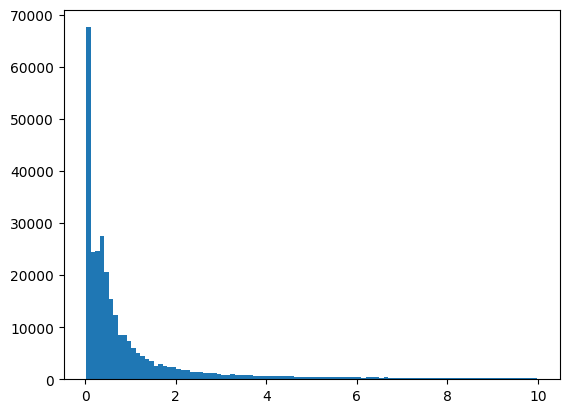

In [22]:
low_dur = rttm[rttm['duration_ms'] < (10 * 1000)]

plt.hist(low_dur['duration_ms'] / 1000, bins=100)
# plt.yscale('log')
plt.show()

In [23]:
import json

subtitle_dir = '../data/raw/'

In [26]:
sub_fns = [file for file in os.listdir(subtitle_dir) if file.endswith('.json3')]

In [30]:
types = [fn.split('.')[1] for fn in sub_fns]
type_dict = {}

for t in types:
    if t not in type_dict:
        type_dict[t] = 0
    type_dict[t] += 1

type_dict

{'en-ehkg1hFWq8A': 81,
 'en-en-ehkg1hFWq8A': 81,
 'en-orig': 111,
 'en': 112,
 'I': 2,
 '': 2}

In [31]:
for fn in sub_fns:
    if 'en' not in fn.split('.')[1]:
        print(fn)

This_Episode_is_A.I._Generated__Trash_Taste_#136_KOsR7CYcuaM.en-orig.json3
This_Episode_is_A.I._Generated__Trash_Taste_#136_KOsR7CYcuaM.en.json3
We_Dont_Know_How_To_Make_Friends...__Trash_Taste_#159_aTP4X03HWc4.en-orig.json3
We_Dont_Know_How_To_Make_Friends...__Trash_Taste_#159_aTP4X03HWc4.en.json3


In [47]:
eps = {}

for fn in sub_fns:
    ident = fn.split('.')[0]
    if ident not in eps:
        eps[ident] = []
    eps[ident].append(fn)

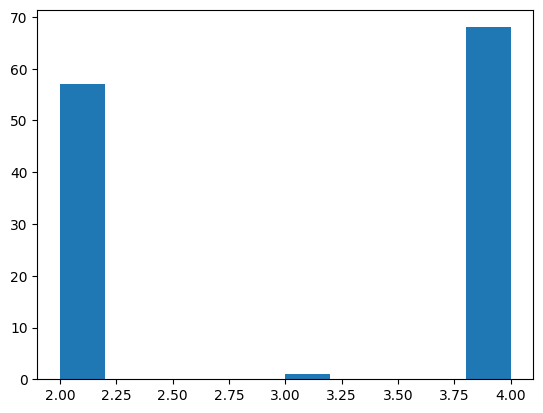

In [48]:
sub_ns = [len(v) for v in eps.values()]

plt.hist(sub_ns)
plt.show()

In [51]:
for ep, subs in eps.items():
    found = False
    for sub in subs:
        if '.en.' in sub:
            found = True
            break
    if not found:
        print(ep)
        print(subs)

Anime_Convention_Horror_Stories__Trash_Taste_#22_1t1lme5nGZE
['Anime_Convention_Horror_Stories__Trash_Taste_#22_1t1lme5nGZE.en-ehkg1hFWq8A.json3', 'Anime_Convention_Horror_Stories__Trash_Taste_#22_1t1lme5nGZE.en-en-ehkg1hFWq8A.json3']
Our_Trash_Taste_in_YouTubers__Trash_Taste_#26_og8CYLCRXeo
['Our_Trash_Taste_in_YouTubers__Trash_Taste_#26_og8CYLCRXeo.en-ehkg1hFWq8A.json3', 'Our_Trash_Taste_in_YouTubers__Trash_Taste_#26_og8CYLCRXeo.en-en-ehkg1hFWq8A.json3']
Roasting_our_WORST_Takes_on_Anime__Trash_Taste_#21_nGx-x0jrE2o
['Roasting_our_WORST_Takes_on_Anime__Trash_Taste_#21_nGx-x0jrE2o.en-ehkg1hFWq8A.json3', 'Roasting_our_WORST_Takes_on_Anime__Trash_Taste_#21_nGx-x0jrE2o.en-en-ehkg1hFWq8A.json3']
The_Internet_Kinda_Sucks_Right_Now__Trash_Taste_#7_SOOPOMAueUA
['The_Internet_Kinda_Sucks_Right_Now__Trash_Taste_#7_SOOPOMAueUA.en-ehkg1hFWq8A.json3', 'The_Internet_Kinda_Sucks_Right_Now__Trash_Taste_#7_SOOPOMAueUA.en-en-ehkg1hFWq8A.json3']
The_Japanese_Food_Youve_Never_Tried__Trash_Taste_#17_pxhJ